# Classification
## Classification
---
### Discrete Values
The task of classification is to predict a __discrete value__.
Discrete data are only able to have certain values, while continuous data can take on any value.
__Labels__ come in __categorical__ form and represent a finite number of classes. They can be numeric or categories like _red, yellow and green_.
### Binary and multi-class Classification
If there are two classes to predict, then it is a binary classification problem. When there are more than two classes, then it is a multi-class classification.\
Common classification algorithms include logistic regression, k nearest neighbours, decision trees, naive bayes, support vector machine, neural networks, etc.\
_Supervised learning problems are grouped into regression and classification problems. Both problems have the common goal of constructing a mapping function from input variable (X) to output variable (y). The difference is that the output variable is continuous in regression but categorical for classification._
### Iris dataset
![Iris](https://api.sololearn.com/DownloadFile?id=3831)\
_The famous iris database, first used by Sir R. A. Fisher, is perhaps the best known dataset to be found in pattern recognition literature. There are 150 iris plants, each with 4 numeric attributes: **sepal length** in cm, **sepal width** in cm, **petal length** in cm, and **petal width** in cm. The task is to predict each plant as an iris-setosa, an iris-versicolor, or an iris-virginica based on these attributes._

Using a simple and well-behaved dataset like this one reduces the learning curve and makes it easier to understand and debug.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv',
                   index_col='id')

iris.shape

(150, 5)

In [2]:
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
id,,,,,
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [3]:
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The count row shows that no data is missing. This is a clean dataset. The range of attributes are of similar magnitude. Otherwise, [feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) may be necessary.

### Class distribution

In [4]:
iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

which is the same as

In [5]:
iris['species'].value_counts()

iris-versicolor    50
iris-setosa        50
iris-virginica     50
Name: species, dtype: int64

This is great utility for checking the distribution of the data in each classes. Iris is a __balanced__ data as the data points for each class are evenly distributed. For imbalanced data, check out [this link](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).
## Data Visualisation
---
### Univariate plot
Univariate means involving only one variable.\
To understand each attribute, start with univariate plots, that are plots of each individual variable. 

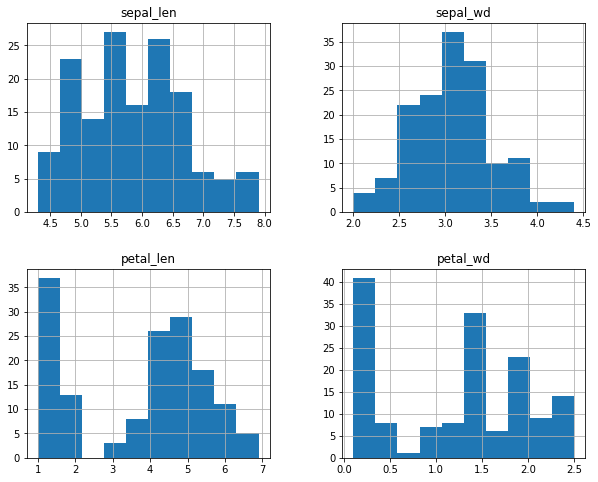

In [6]:
iris.hist(figsize=(10, 8))
plt.show()

The graph presents the distribution of the input variables, showing that both sepal length and sepal width have a normal (Gaussian) distribution, that is the distributions have a symmetric bell shape. In contrast, the length of petal is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Even less patterns is observed for petal width.\
More univariate summary plots include:
- box plot
- density plot
- box plot

### Multivariate plot
To see interactions between two __attribtues__, use scatter plots. Define a different colour code for each species so as to distinguish them visually.

In [7]:
# build a dict mapping species to an integer code
pd.Series(range(iris.species.nunique()),
          index=iris.species.unique()).to_dict()

{'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}

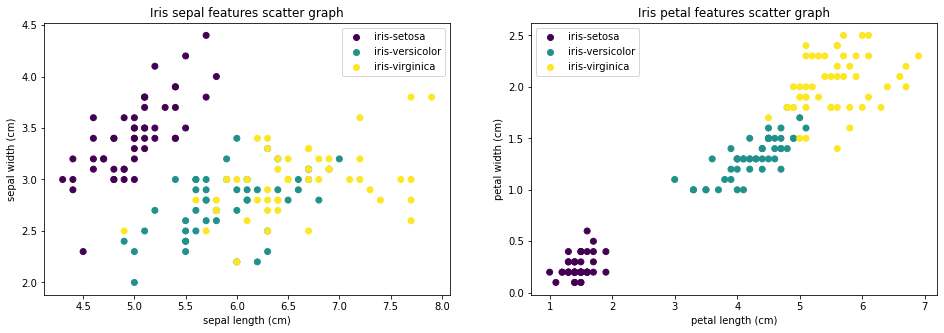

In [45]:
inv_name_dict = {'iris-setosa': 0,
                 'iris-versicolor': 1,
                 'iris-virginica': 2}

# build interger code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

plt.figure(figsize=(16, 5))

# scatter plot for sepal length and width
plt.subplot(1, 2, 1)
sepal_scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c=colors)
plt.title('Iris sepal features scatter graph')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(handles=sepal_scatter.legend_elements()[0],
           labels=inv_name_dict.keys())

# scatter plot for petal length and width
plt.subplot(1, 2, 2)
petal_scatter = plt.scatter(iris['petal_len'], iris['petal_wd'], c=colors)
plt.title('Iris petal features scatter graph')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles=petal_scatter.legend_elements()[0],
           labels=inv_name_dict.keys())

plt.show()

From the left grpah, only iris-setosa can be distinguished from others using sepal length and width __features__. From the right graph, The length and width of petals are highly correlated, and these two features are very useful to identify various iris species. It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, indicating difficulties for some classifiers. Consider that when deciding which features to use.\
`pandas.plotting.scatter_matrix` function is used to show a matrix of histograms of all features and scatter graphs of them. Besides showing the distribution of each features, it helps spot structured relationships between features.

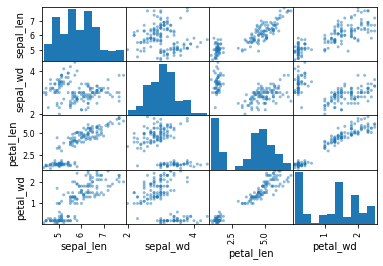

In [9]:
pd.plotting.scatter_matrix(iris)
plt.show()

### K nearest neighbours
K nearest neighbours (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote. Changing _k_ could significantly impact the output of the model. It is a __hyperparameter__, which is set before the learning process begins.\
In scikit-learn, this is implemented as following:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

_K nearest neighbours can also be used for regression problems. However, for regression problems, the prediction is made by taking the mean labels of the k closest data points._

## Modeling
---
### Data preparation
Petal length and width have been identified to be the most useful features to separate species.

In [11]:
X = iris[['petal_len', 'petal_wd']]
y = iris['species']

To assess the performance of the model, separate the data into training and test sets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3,
                                                    random_state=1,
                                                    stratify=y)

The split is stratified using label (y) to ensure there is a even distribution of all classes in both datasets.

In [13]:
print(y_train.value_counts())
print(y_test.value_counts())

iris-versicolor    35
iris-setosa        35
iris-virginica     35
Name: species, dtype: int64
iris-setosa        15
iris-virginica     15
iris-versicolor    15
Name: species, dtype: int64


### Modeling
Build and train the model.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

This outputs the train model. Default values are used for most parameters, e.g., `metric='minkowski'` and `p=2` together defines that the distance is [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance). The use of all parameters can be found on [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

## Prediction
---
### Label prediction

In [15]:
y_pred = knn.predict(X_test)
y_pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

### Probability prediction
For all classifiers implemented in scikit-learn, there is an additional method `predict_proba`. Instead of splitting the label, it outputs the probability for the target in array form. Below is an example of the predicted probabilities for the 11th and the 12th flowers:

In [16]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

in contrast to `predict`,

In [17]:
y_pred[10:12]

array(['iris-setosa', 'iris-virginica'], dtype=object)

Probability prediction or soft prediction outputs an array of the probabilities of the data point being classified into each class for each data point, whereas hard prediction outputs the label with highest probability only.

## Model Evaluation
---
### Accuracy
For classification algorithms, the most straightforward metric is accuracy. It is the proportion of data points whose predicted labels exactly match the observed labels.

In [18]:
(y_pred==y_test.values).sum()/y_test.size

0.9777777777777777

which is equivalent to

In [19]:
knn.score(X_test, y_test)

0.9777777777777777

or in scikit-learn metrics, the function `accuracy_score`

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

### Confusion matrix
Calculating a confusion matrix allows us to distinguish the what the classification is correct about and the types of errors it is making. It is a summary (or table) of the counts of all predictions broken down by each class for both the predictions and the true values. 

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=list(inv_name_dict.keys()))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

It is also possible to visualise the confusion matrix.

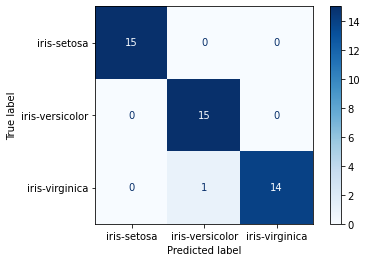

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### K-fold cross validation
Splitting data into traning and test sets is a simple __cross validation__ technique, which is also known as the __holdout__ method. However, the splitting process is random, so the accuracy of model could be sensitive to how the data is split. K-fold crosse validation attemps to overcome this by dividing the data into __k subsets__. Then the holdout method is repeated k times, such that each time, one of the k subsets is reserved as the test set and the other k-1 subsets are combined to train the model.

In [23]:
from sklearn.model_selection import cross_val_score
# create a new model
knn_cv = KNeighborsClassifier(n_neighbors=3)
# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
# display the scores for each trial
cv_scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

Then the accuracy is averaged over k trials to provide the total effectiveness of the model.

In [24]:
cv_scores.mean()  # averaged score

0.9533333333333334

### Grid search
Finding the optimal k is called __fine tuning the hyperparameter__. A handy tool is grid search. In schikit-learn, `GridSearchCV` trains the model multiple times on a range of values specified with the `param_grid` parameter and computes cross validation score, so that we can determine which of the values for the tested hyperparameters perform the best.

In [25]:
from sklearn.model_selection import GridSearchCV
# create a new knn model
knn2 = KNeighborsClassifier()
# create a dictionary of values that need to be tested
param_grid = {'n_neighbors': np.arange(2, 10)}
# use grid search to test all values for parameter grid
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
# fit model to data
knn_gscv.fit(X, y)
# gte top performing parameter values
knn_gscv.best_params_

{'n_neighbors': 4}

The best value for `n_neibors` is 4. The peak performance socre is

In [26]:
knn_gscv.best_score_

0.9666666666666668

Build the final model with the best performing parameters.

In [27]:
knn_final = KNeighborsClassifier(**knn_gscv.best_params_)
knn_final.fit(X, y)
y_pred = knn_final.predict(X)
knn_final.score(X, y)

0.9733333333333334

## Label Prediction with New Data
---
### Label prediction with new data

Predict for an iris recorded that the length and width of its sepal are 5.84 cm and 3.06 cm, respectively, and the length and width of its petal are 3.76 cm and 1.20 cm, respectively.

In [28]:
new_data = np.array([[3.76, 1.20]])
knn_final.predict(new_data)

array(['iris-versicolor'], dtype=object)

### Probability prediction with new data

In [29]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

## Visual Representation of Prediction Correctness
_Not presented in Sololearn course_

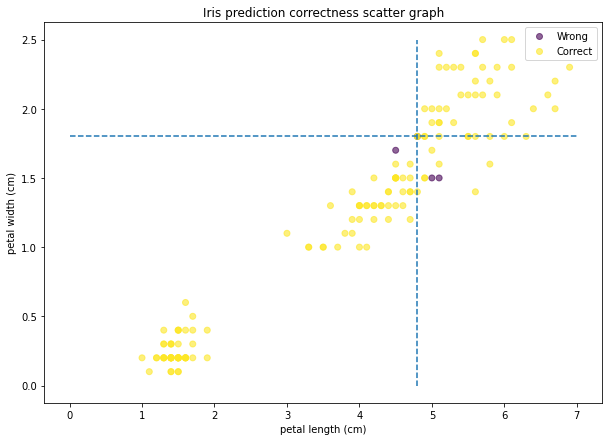

,sepal_len,sepal_wd,petal_len,petal_wd,species
id,,,,,
70,5.9,3.2,4.8,1.8,iris-versicolor
106,4.9,2.5,4.5,1.7,iris-virginica
119,6.0,2.2,5.0,1.5,iris-virginica
133,6.3,2.8,5.1,1.5,iris-virginica


In [83]:
# prepare a series of prediction correctness
pred_correct = iris['species'] == y_pred

plt.figure(figsize = (10, 7))

# plot scatter graph
pred_scatter = plt.scatter(iris['petal_len'], iris['petal_wd'],
                           c=pred_correct,
                           alpha=.6)

# plot details
plt.title('Iris prediction correctness scatter graph')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles = pred_scatter.legend_elements()[0],
           labels=['Wrong', 'Correct'])

# pinpoint a wrongly predicted data 
plt.vlines(4.8, ymin=0, ymax=2.5, linestyle='--')
plt.hlines(1.8, xmin=0, xmax=7.0, linestyle='--')

plt.show()

iris.loc[~pred_correct]